# Donors Choose

Assignment no. 2

I used 6k data points for this assignment.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
d=pd.read_csv("train_data.csv")
resource_data=pd.read_csv("resources.csv")

In [113]:
#sample of 6k data points from 109248 data points from the dataset.

sampled_data_1=d.iloc[0:2000,:]
sampled_data_2=d.iloc[59000:61000,:]
sampled_data_3=d.iloc[98000:100000,:]
sampled_data=np.vstack((sampled_data_1,sampled_data_2,sampled_data_3))    
print(len(sampled_data)) 
sampled_data.shape

6000


(6000, 17)

In [117]:
df=pd.DataFrame(sampled_data,columns=tuple(d.columns))
df.columns=d.columns
df.reset_index()
df.shape
print(df.columns)

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved'],
      dtype='object')


I taked only 6k data points for the assignment.
This dataset contain 6k rows and 17 features

In [118]:
y_value_counts=tuple(df['project_is_approved'].value_counts())

In [119]:
y_value_counts

(5112, 888)

Out of 6k data points 5102 are approved and rest 898 are not approved projects.

In [120]:
print("%age of the approved project ",y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))

%age of the approved project  0.852


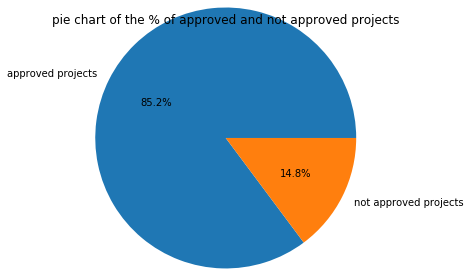

In [121]:
plt.pie(y_value_counts,labels=('approved projects','not approved projects'),autopct="%0.1f%%",radius=1.5)
plt.title("pie chart of the % of approved and not approved projects")
plt.show()

# Univariate analysis: school state

In [122]:
temp=pd.DataFrame(data=df.groupby('school_state')['project_is_approved'].apply(np.mean)).reset_index()

In [123]:
total=pd.DataFrame(df.groupby('school_state')['project_is_approved'].agg({'total':'count'})).reset_index()
total.columns=("school_state","total")
temp["total"]=total['total']


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [124]:
temp.columns=('school_state','average','total')

In [125]:
temp.sort_values(by=['average'],inplace=True,ascending=False)

In [126]:
print("school which proposed maximum approved projects------>")
print(temp.head())
print("================================================================")
print("schools which proposed minimum approved projects------>")
print(temp.tail())

school which proposed maximum approved projects------>
   school_state   average  total
28           ND  1.000000     10
8            DE  1.000000     17
32           NM  0.960000     25
23           MN  0.943396     53
37           OR  0.926471     68
schools which proposed minimum approved projects------>
   school_state   average  total
7            DC  0.774194     31
0            AK  0.772727     22
39           RI  0.761905     21
26           MT  0.750000      8
46           VT  0.333333      3


In [127]:
accepted=np.array((temp["average"].values)*(temp['total'].values),dtype=int)

In [128]:
temp['accepted']=accepted

In [129]:
temp.sort_values(by=["total"],inplace=True,ascending=False)

In [130]:
temp.head()

,school_state,average,total,accepted
4,CA,0.867947,833,723
43,TX,0.828162,419,347
34,NY,0.861042,403,347
9,FL,0.862573,342,295
27,NC,0.880435,276,243


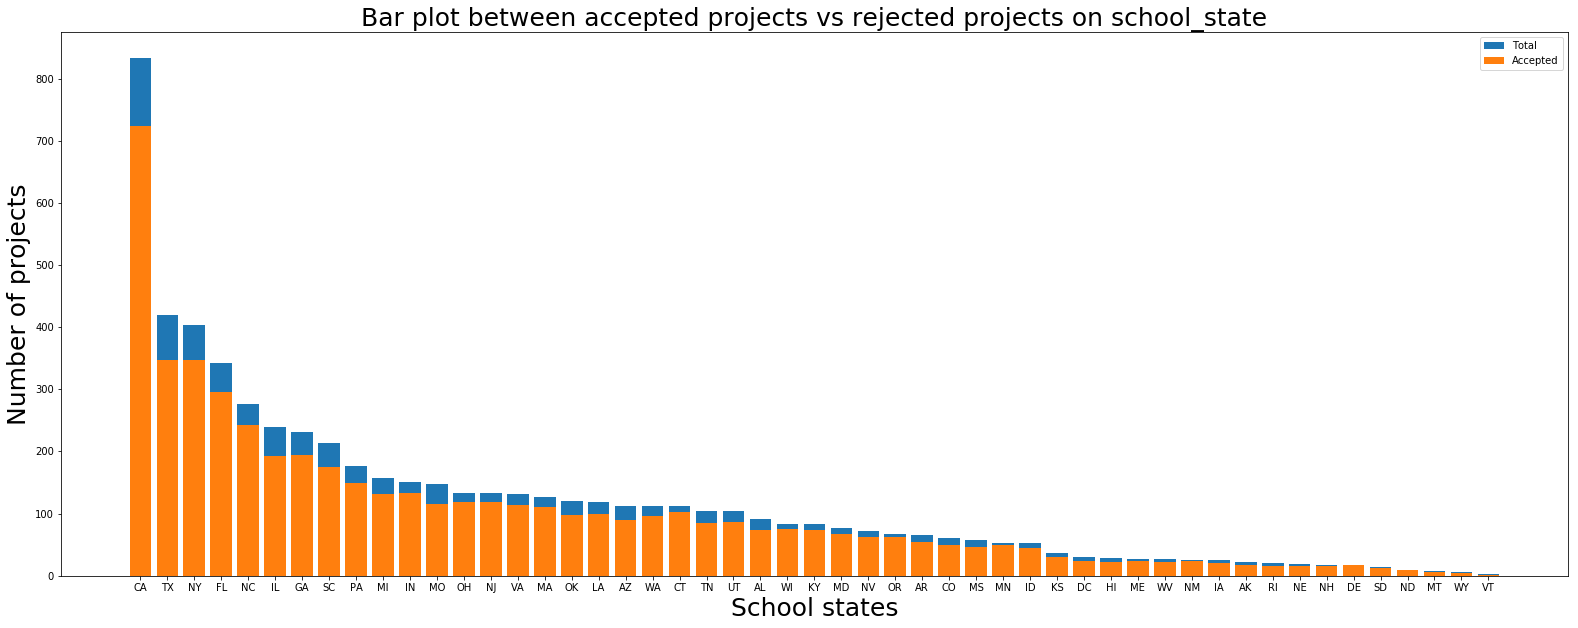

   school_state   average  total  accepted
4            CA  0.867947    833       723
43           TX  0.828162    419       347
34           NY  0.861042    403       347
9            FL  0.862573    342       295
27           NC  0.880435    276       243
   school_state   average  total  accepted
41           SD  0.857143     14        12
28           ND  1.000000     10        10
26           MT  0.750000      8         6
50           WY  0.833333      6         5
46           VT  0.333333      3         1


In [131]:
plt.figure(figsize=(27,10))
plt.bar(temp["school_state"],temp["total"],label="Total")
plt.bar(temp["school_state"],temp["accepted"],label="Accepted")
plt.title("Bar plot between accepted projects vs rejected projects on school_state",fontsize=25)
plt.xlabel("School states",fontsize=25)
plt.ylabel("Number of projects",fontsize=25)
plt.legend()
plt.show()
print(temp.head())
print("="*50)
print(temp.tail())

Observations:

From the state CA maximum number of projects proposals are submitted and out of which 86% proposals are approved , and there are considerable variability in the total no. of projects proposals.
school state VT has submitted minimum projects proposals .

# Univariate analysis : Teacher prefix

In [132]:
def stack_plot(para1):  
  temp1=pd.DataFrame(data=df.groupby(para1)["project_is_approved"].apply(np.mean)).reset_index()
  temp2=pd.DataFrame(data=df.groupby(para1)["project_is_approved"].agg({'total':'count'})).reset_index()
  temp1['total']=temp2['total']
  accepted=np.array(temp1['project_is_approved'].values*temp1["total"].values,dtype=int)
  temp1['accepted']=accepted
  temp1.columns=(para1,'avg','total','accepted')
  temp1.sort_values(by=['total'],inplace=True,ascending=False)
  plt.figure(figsize=(27,10))
  plt.bar(temp1[para1],temp1['total'],label='Total')
  plt.bar(temp1[para1],temp1['accepted'],label="Accepted")
  plt.title('accepted vs total',fontsize=25)
  plt.ylabel('Number of projects',fontsize=25)
  plt.xlabel(para1,fontsize=25)
  plt.legend()
  plt.show()
  print("===========================================================")
  print(temp1.head())
  print("====================================================================")
  print(temp1.tail())

# Univariate analysis : teacher_prefix

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


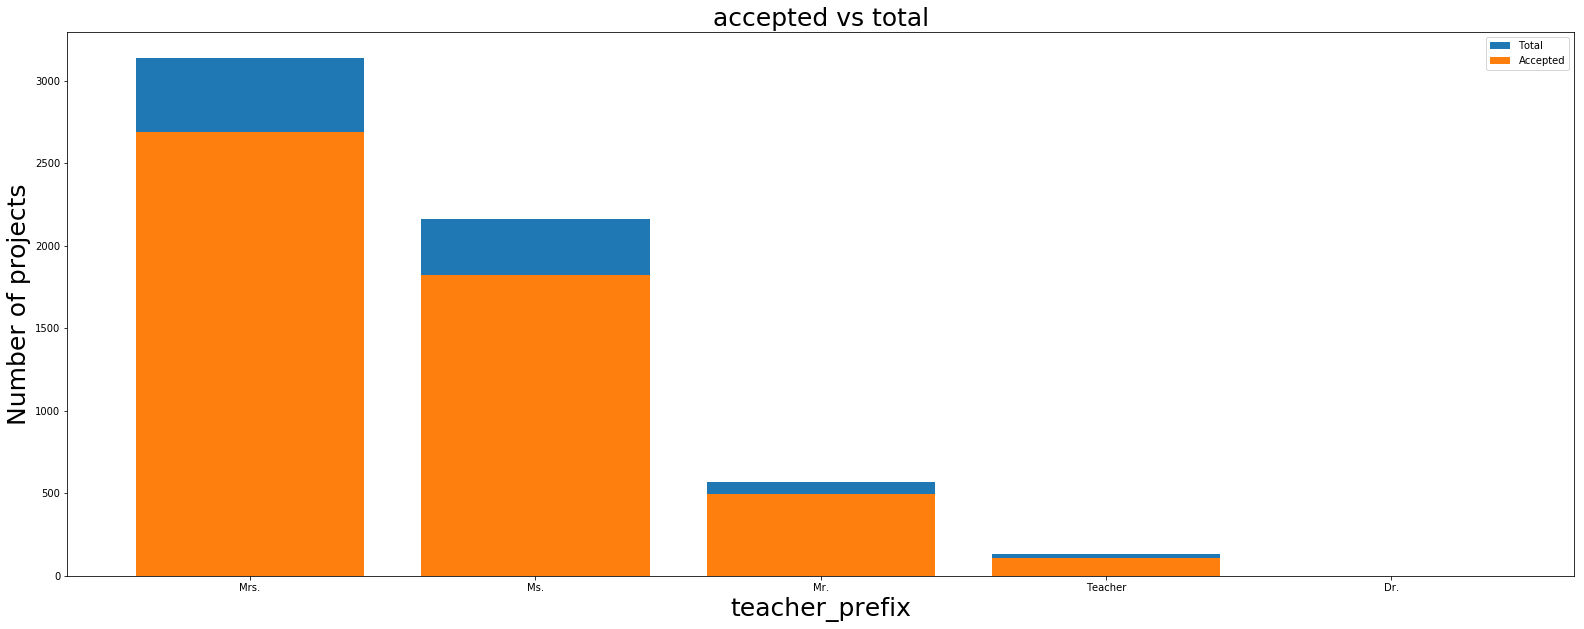

  teacher_prefix       avg  total  accepted
2           Mrs.  0.857462   3136      2689
3            Ms.  0.843201   2162      1823
1            Mr.  0.864912    570       493
4        Teacher  0.809160    131       106
0            Dr.  1.000000      1         1
  teacher_prefix       avg  total  accepted
2           Mrs.  0.857462   3136      2689
3            Ms.  0.843201   2162      1823
1            Mr.  0.864912    570       493
4        Teacher  0.809160    131       106
0            Dr.  1.000000      1         1


In [133]:
stack_plot("teacher_prefix")

Observation:

Teachers whose prefix is Mrs. are submitted maximum 3136 projects proposals and out of which 85% are approved and the Teachers whose prefix is Teacher are submitted min. projects propopsals 131 and out of which 80% are approved.

# Univariate Analysis: Project Grade category

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


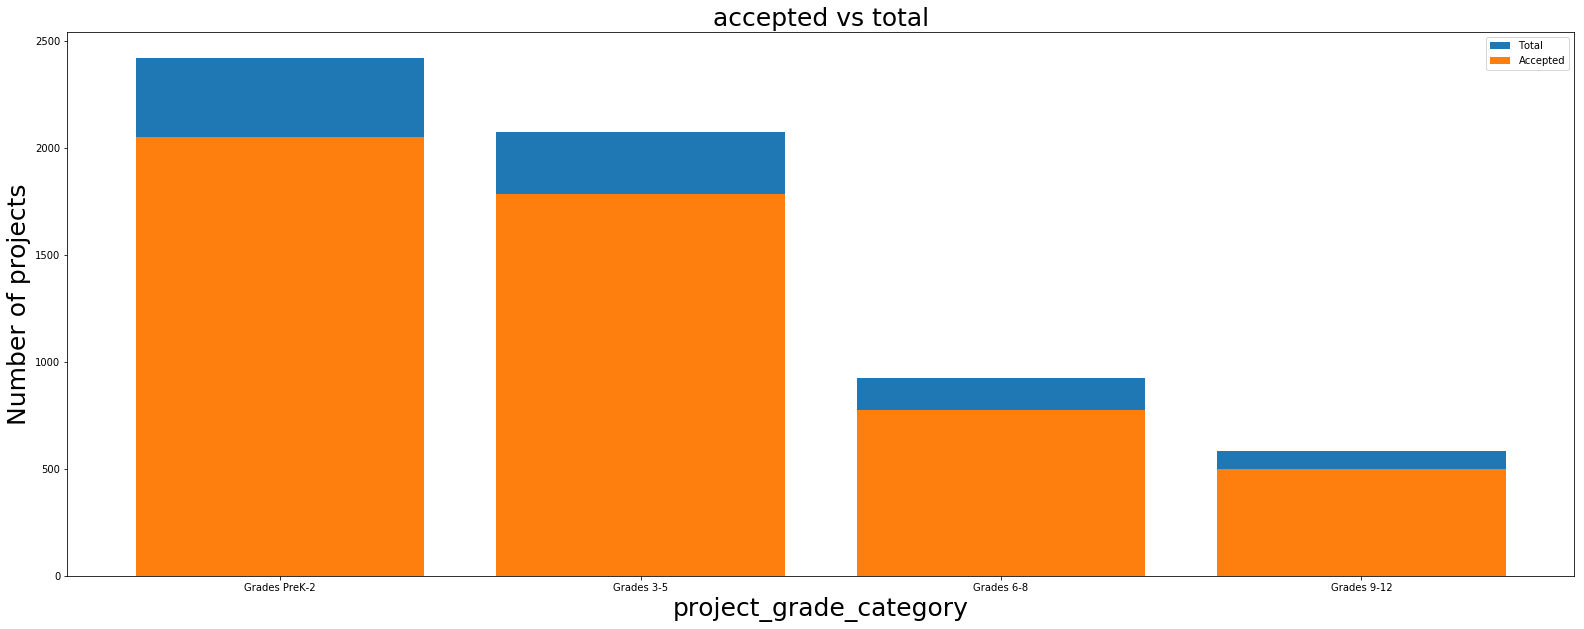

  project_grade_category       avg  total  accepted
3          Grades PreK-2  0.848284   2419      2052
0             Grades 3-5  0.861138   2074      1786
1             Grades 6-8  0.838919    925       776
2            Grades 9-12  0.855670    582       498
  project_grade_category       avg  total  accepted
3          Grades PreK-2  0.848284   2419      2052
0             Grades 3-5  0.861138   2074      1786
1             Grades 6-8  0.838919    925       776
2            Grades 9-12  0.855670    582       498


In [134]:
stack_plot("project_grade_category")

Observation:

For the students of Grades Prek-2 maximum no. of projects proposals 2419 are submitted and out of which 2052 are approved that is 84.8% are approved.

# Univariate analysis: Project_subject_categories

In [135]:
df["project_subject_categories"].head()

0                    Literacy & Language
1      History & Civics, Health & Sports
2                        Health & Sports
3    Literacy & Language, Math & Science
4                         Math & Science
Name: project_subject_categories, dtype: object

In [136]:
from tqdm import tqdm
from bs4 import BeautifulSoup
import re
# https://stackoverflow.com/a/47091490/4084039
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
cat_list=[]

for i in tqdm(df["project_subject_categories"].values):
    t=''
    for phrase in i.split(','):
        phrase=BeautifulSoup(phrase,'lxml').get_text()
        phrase=decontracted(phrase)
        phrase=phrase.replace("\\r",'')
        phrase=phrase.replace("\\t",'')
        phrase=phrase.replace("\\'",'')
        phrase=phrase.replace("\\n","")
        phrase=phrase.replace('The','')
        phrase=phrase.replace(" ","")
        phrase=phrase.replace('&','_')
        #phrase=re.sub('[^a-zA-Z0-9]+','',phrase)
        t+=phrase.strip()+" "
    cat_list.append(t.strip())   

100%|████████████████████████████████████████████████████████████████████████████| 6000/6000 [00:04<00:00, 1431.12it/s]


In [137]:
df["clean_subject_categories"]=cat_list

In [138]:
print(df["clean_subject_categories"].head())
print("========================================")
print(df["project_subject_categories"].head())

0                 Literacy_Language
1      History_Civics Health_Sports
2                     Health_Sports
3    Literacy_Language Math_Science
4                      Math_Science
Name: clean_subject_categories, dtype: object
0                    Literacy & Language
1      History & Civics, Health & Sports
2                        Health & Sports
3    Literacy & Language, Math & Science
4                         Math & Science
Name: project_subject_categories, dtype: object


In [139]:
df.drop(['project_subject_categories'],axis=1,inplace=True)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


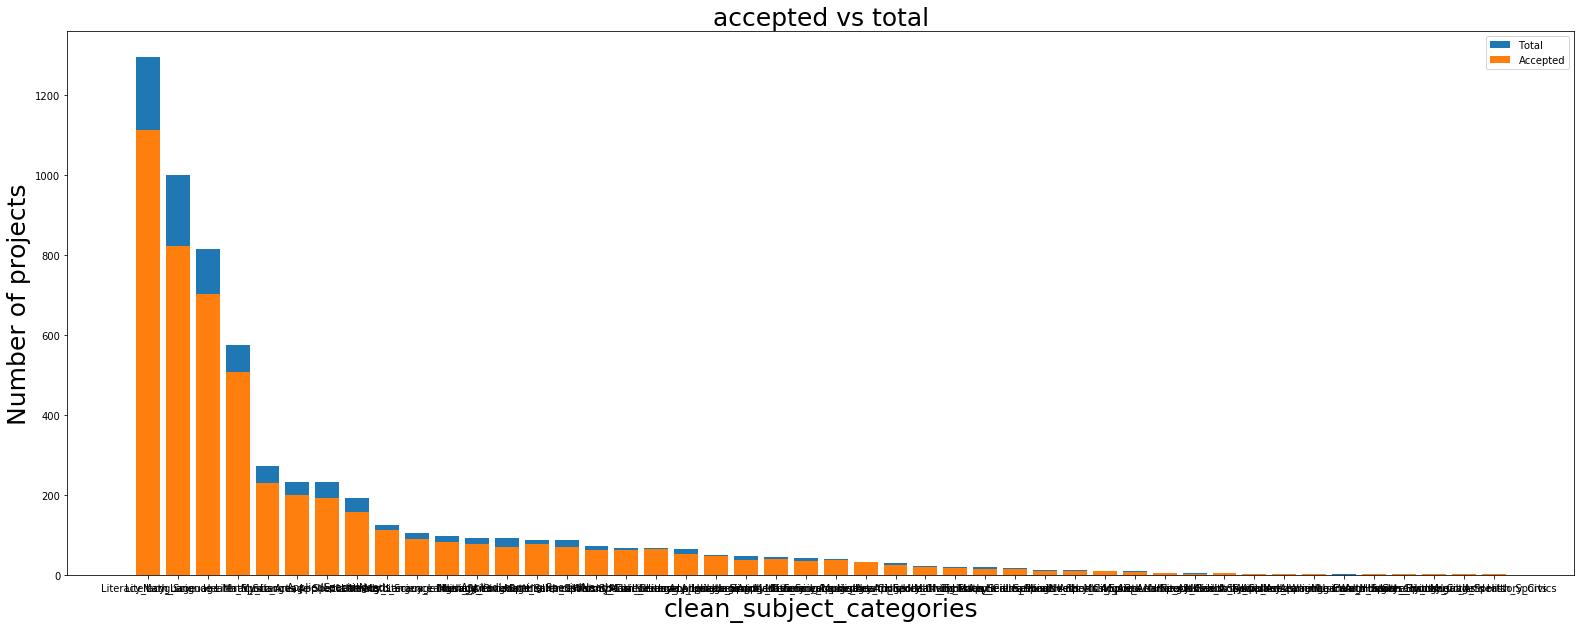

          clean_subject_categories       avg  total  accepted
21               Literacy_Language  0.858578   1294      1111
29                    Math_Science  0.823824    999       823
25  Literacy_Language Math_Science  0.862408    814       702
7                    Health_Sports  0.883478    575       508
36                      Music_Arts  0.842491    273       230
           clean_subject_categories  avg  total  accepted
38         Music_Arts Health_Sports  0.5      2         1
9      Health_Sports History_Civics  0.5      2         1
16     History_Civics Health_Sports  1.0      2         2
23  Literacy_Language Health_Sports  1.0      2         2
39        Music_Arts History_Civics  1.0      1         1


In [140]:
stack_plot('clean_subject_categories')

Observation:

subject category Literacy_Language has maximum no. of projects proposals 1294 and out of which 1111 are approved but Literacy_Language Math_Science has submitted 814 projects proposals and out of which 86% of proposals are approved.
History_Civics health_Sports has submitted only one project proposals and that is approved.

In [141]:
L=[]
for i in df["clean_subject_categories"].values:
    for j in i.split(" "):
        L.append(j)

In [142]:
from collections import Counter
my_counter=Counter(L)

In [143]:
cat_dict=dict(my_counter)
sorted_dict=dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

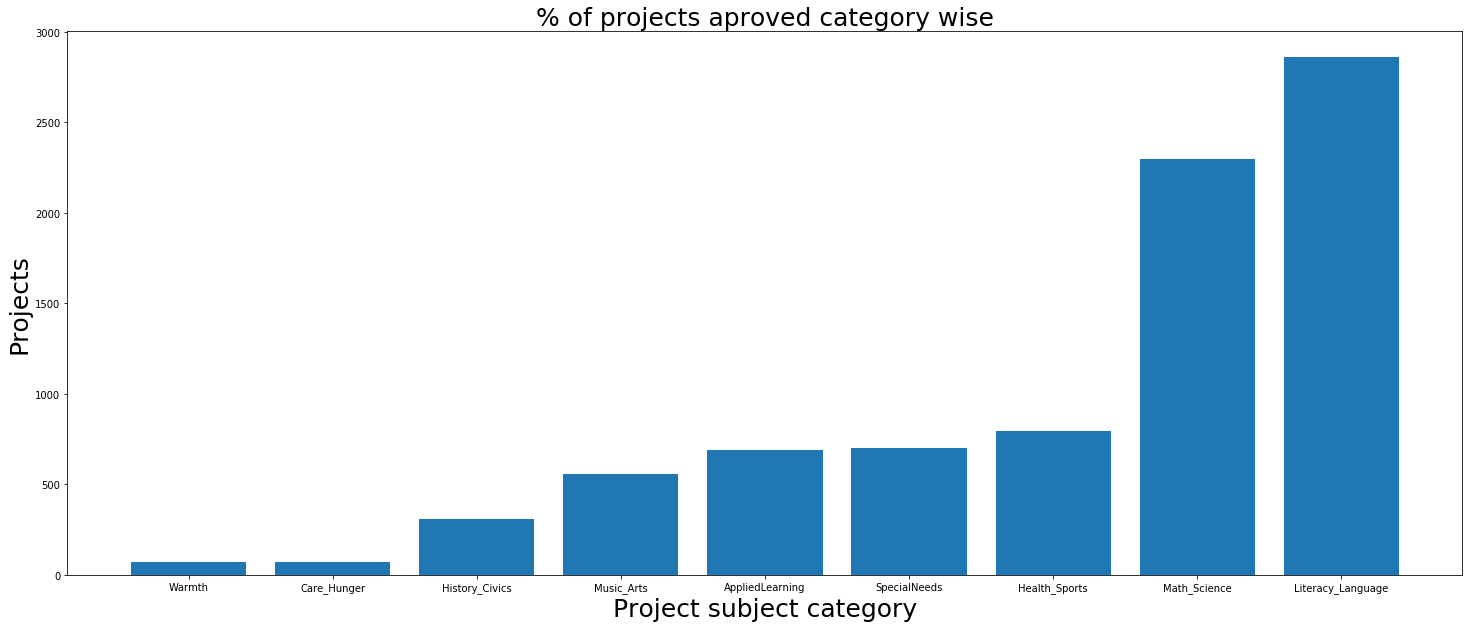

In [144]:
plt.figure(figsize=(25,10))
plt.bar(sorted_dict.keys(),sorted_dict.values())
plt.ylabel("Projects",fontsize=25)
plt.xlabel("Project subject category",fontsize=25)
plt.title("% of projects aproved category wise",fontsize=25)
plt.show()

Observation:

subject category Literacy_Language has maximum projects proposals. and warmth has minimum proposals.
Health_Sports and Math_Science also have considereble amount of proposals.

In [145]:
max(sorted_dict.values())

2860

Literacy_Language has maximum 2860 proposals out of 6k proposals of this dataset.

In [146]:
sorted_dict.items()

dict_items([('Warmth', 71), ('Care_Hunger', 71), ('History_Civics', 310), ('Music_Arts', 557), ('AppliedLearning', 688), ('SpecialNeeds', 701), ('Health_Sports', 794), ('Math_Science', 2296), ('Literacy_Language', 2860)])

In [147]:
for i,j in sorted_dict.items():
    print(i,"             ",j)

Warmth               71
Care_Hunger               71
History_Civics               310
Music_Arts               557
AppliedLearning               688
SpecialNeeds               701
Health_Sports               794
Math_Science               2296
Literacy_Language               2860


# Univariate analysis: Project_subject_subcategories

In [148]:
cat_list_sub=[]
for i in tqdm(df["project_subject_subcategories"].values):
    t=''
    for phrase in i.split(','):
        phrase=BeautifulSoup(phrase,'lxml').get_text()
        phrase=decontracted(phrase)
        phrase=phrase.replace("\\r",'')
        phrase=phrase.replace("\\t",'')
        phrase=phrase.replace("\\'",'')
        phrase=phrase.replace("\\n","")
        phrase=phrase.replace('The','')
        phrase=phrase.replace(" ","")
        phrase=phrase.replace('&','_')
       
        t+=phrase.strip()+" "
    cat_list_sub.append(t.strip())        

100%|████████████████████████████████████████████████████████████████████████████| 6000/6000 [00:04<00:00, 1332.42it/s]


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 2160x720 with 0 Axes>

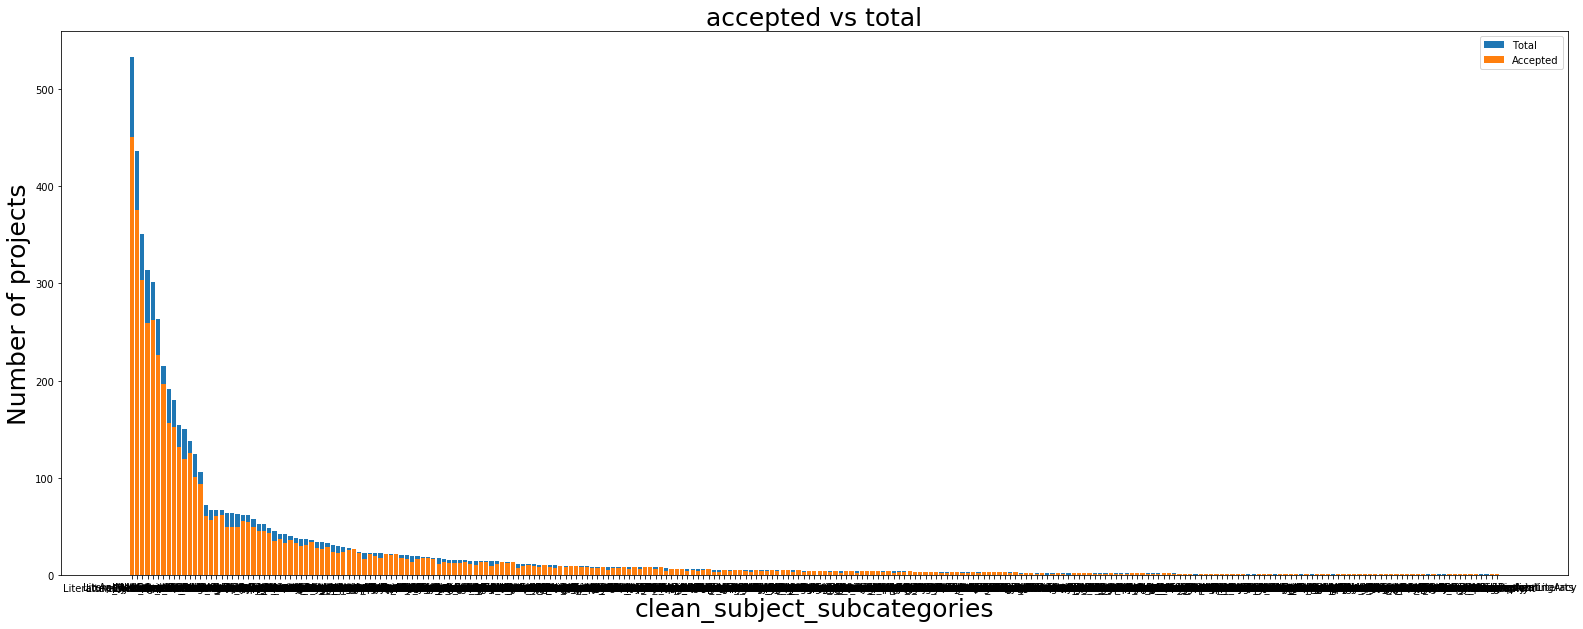

        clean_subject_subcategories       avg  total  accepted
197                        Literacy  0.846154    533       451
199            Literacy Mathematics  0.862385    436       376
210  Literature_Writing Mathematics  0.866097    351       304
219                     Mathematics  0.824841    314       259
198     Literacy Literature_Writing  0.867550    302       262
           clean_subject_subcategories  avg  total  accepted
95                           ESL Music  1.0      1         1
96               ESL ParentInvolvement  0.0      1         0
97                  ESL PerformingArts  0.0      1         0
10   AppliedSciences FinancialLiteracy  1.0      1         1
138     Extracurricular PerformingArts  1.0      1         1


In [149]:
df["clean_subject_subcategories"]=cat_list_sub
#df.drop(["project_subject_subcategories"],axis=1,inplace=True)
plt.figure(figsize=(30,10))
stack_plot("clean_subject_subcategories")
plt.show()

Observations:

In the bar plot clean_subject_subcategories are unreadable but from the numerical observation Literacy proposed maximum projects for approval.and Literacy Mathematics proposed 436 and out of which 86% are approved while Literacy has 84.6% approved and college_careerprep and music and EarlyDevelopment and health_LifeScience gave minimum proposals.

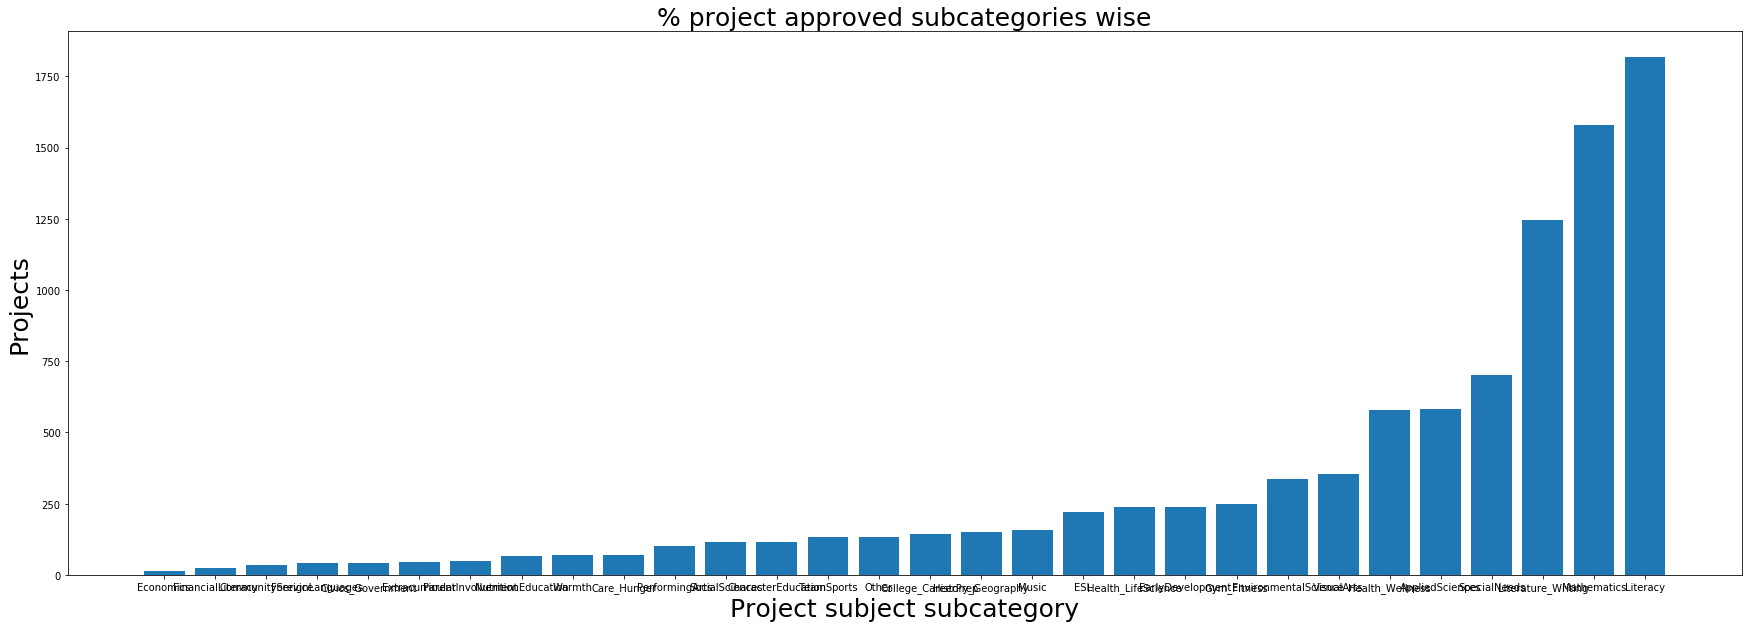

In [150]:
L=[]
for i in df["clean_subject_subcategories"].values:
    for j in i.split(" "):
        L.append(j)
        
from collections import Counter
my_counter=Counter(L)
sub_dict=dict(my_counter)
sorted_sub_dict=dict(sorted(sub_dict.items(),key=lambda kv:kv[1]))
plt.figure(figsize=(30,10))
plt.bar(sorted_sub_dict.keys(),sorted_sub_dict.values())
plt.ylabel("Projects",fontsize=25)
plt.title("% project approved subcategories wise",fontsize=25)
plt.xlabel("Project subject subcategory",fontsize=25)
plt.show()

X axis of this bar plot are almost unreadable.

In [151]:
for i,j in sorted_sub_dict.items():
    print(i," :",j)

Economics  : 13
FinancialLiteracy  : 25
CommunityService  : 35
ForeignLanguages  : 41
Civics_Government  : 42
Extracurricular  : 45
ParentInvolvement  : 48
NutritionEducation  : 66
Warmth  : 71
Care_Hunger  : 71
PerformingArts  : 102
SocialSciences  : 116
CharacterEducation  : 117
TeamSports  : 133
Other  : 133
College_CareerPrep  : 142
History_Geography  : 151
Music  : 159
ESL  : 219
Health_LifeScience  : 237
EarlyDevelopment  : 237
Gym_Fitness  : 250
EnvironmentalScience  : 338
VisualArts  : 353
Health_Wellness  : 580
AppliedSciences  : 581
SpecialNeeds  : 701
Literature_Writing  : 1244
Mathematics  : 1578
Literacy  : 1817


Observation:

subject_subcategory Literacy gave maximum 1817 proposals and Mathematics has 1578 projects proposals
while Ecomomins has only 13.

# Univariate Analysis: Text features(Title)

100%|██████████████████████████████████████████████████████████████████████████| 6000/6000 [00:00<00:00, 264349.67it/s]


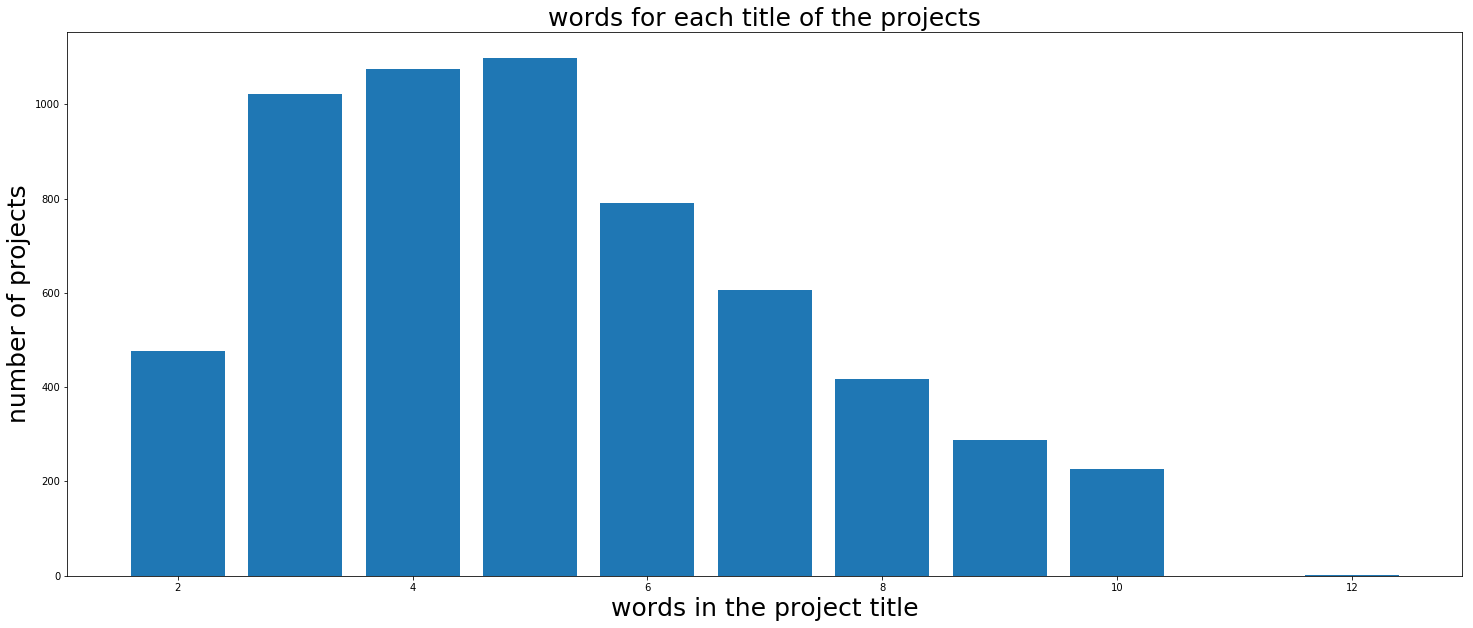

In [152]:
L=[]
for i in tqdm(df["project_title"].values):
    L.append(len(i.split()))
from collections import Counter
my_counter=Counter(L)
dict_c=dict(my_counter)
sorted_count_dict=dict(sorted(dict_c.items(),key=lambda kv:kv[1]))
plt.figure(figsize=(25,10))
plt.bar(sorted_count_dict.keys(),sorted_count_dict.values())
plt.xlabel("words in the project title",fontsize=25)
plt.ylabel("number of projects",fontsize=25)
plt.title("words for each title of the projects",fontsize=25)
plt.show()    

In [153]:
print(sorted_count_dict.items())

dict_items([(12, 1), (10, 227), (9, 287), (8, 417), (2, 476), (7, 607), (6, 790), (3, 1022), (4, 1075), (5, 1098)])


Observation:

Maximum proposals of the projects which contain 5 words in the projects title.projects containing 5 words in their projects proposals have 1098 proposals and projects containig 4 words have 107 proposals while projects containing 12 words has only 1 proposals.

In [154]:
approved_word_count=df[df["project_is_approved"]==1]["project_title"].str.split().apply(len).values
rejected_word_count=df[df["project_is_approved"]==0]["project_title"].str.split().apply(len).values

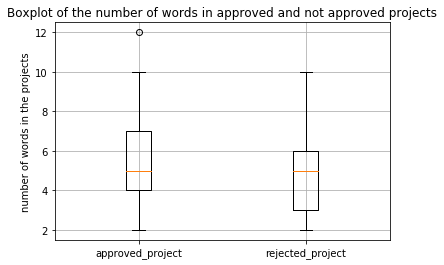

In [155]:
plt.boxplot([approved_word_count,rejected_word_count])
plt.xticks([1,2],["approved_project","rejected_project"])
plt.title("Boxplot of the number of words in approved and not approved projects")
plt.ylabel("number of words in the projects")
plt.grid()
plt.show()

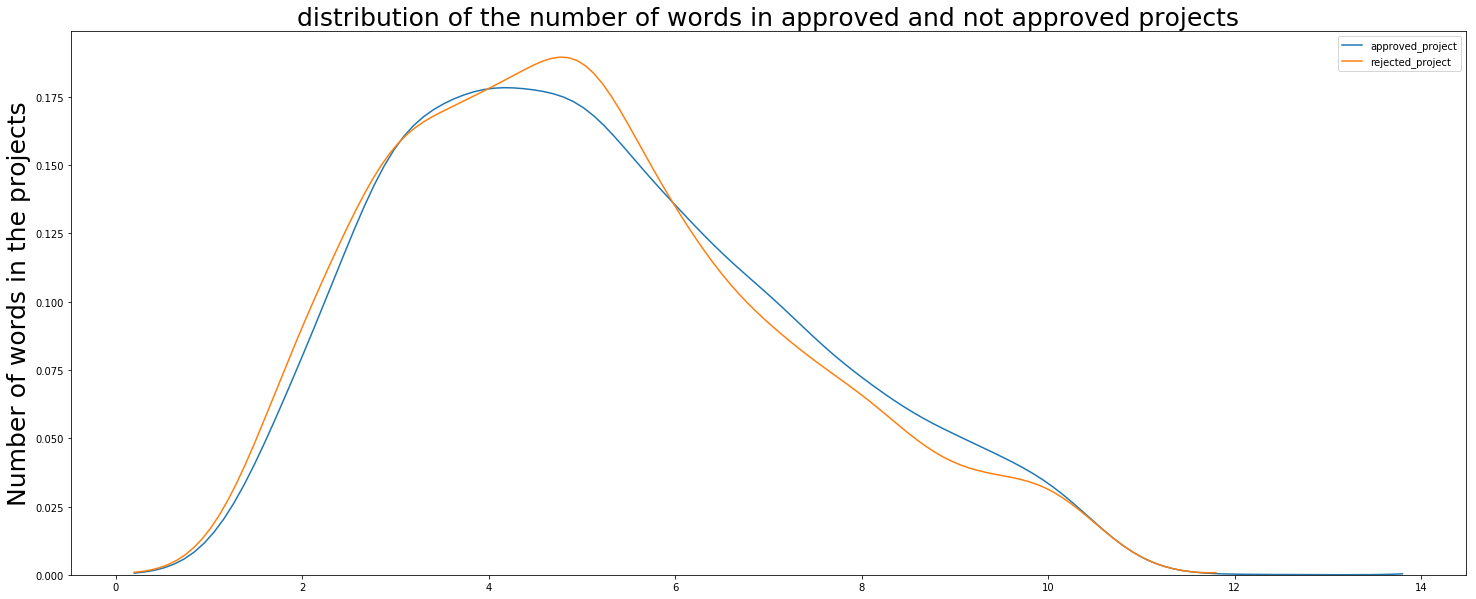

In [156]:
plt.figure(figsize=(25,10))
sns.kdeplot(approved_word_count,label="approved_project",bw=0.6)
sns.kdeplot(rejected_word_count,label="rejected_project",bw=0.6)
plt.title("distribution of the number of words in approved and not approved projects",fontsize=25)
plt.ylabel("Number of words in the projects",fontsize=25)
plt.legend()
plt.show()

Observation.

From the boxplot and distribution plot i observed that dispributon of approved projects is ahead to the not approved projects.
It means approved projects contain more words than not approved projects because more words more about the projects.

Median of approved project is slightly more than median of the not approved projects and 25th and 75th percentile of the approved projects is also slightly more than not approved projects.

# Univariate analysis:essay(text)

In [157]:
#merge all the four projects essay to form an essay.
df["essay"]=df['project_essay_1'].map(str)+df["project_essay_2"].map(str)+df["project_essay_3"].map(str)+df["project_essay_4"].map(str)

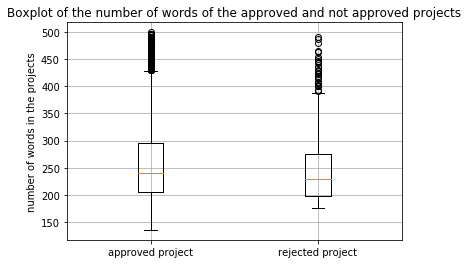

In [158]:
word_for_approved=df[df["project_is_approved"]==1]["essay"].str.split().apply(len).values
word_for_rejected=df[df["project_is_approved"]==0]["essay"].str.split().apply(len).values
plt.boxplot([word_for_approved,word_for_rejected])
plt.xticks([1,2],["approved project","rejected project"])
plt.title("Boxplot of the number of words of the approved and not approved projects")
plt.ylabel("number of words in the projects")
plt.grid()
plt.show()

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


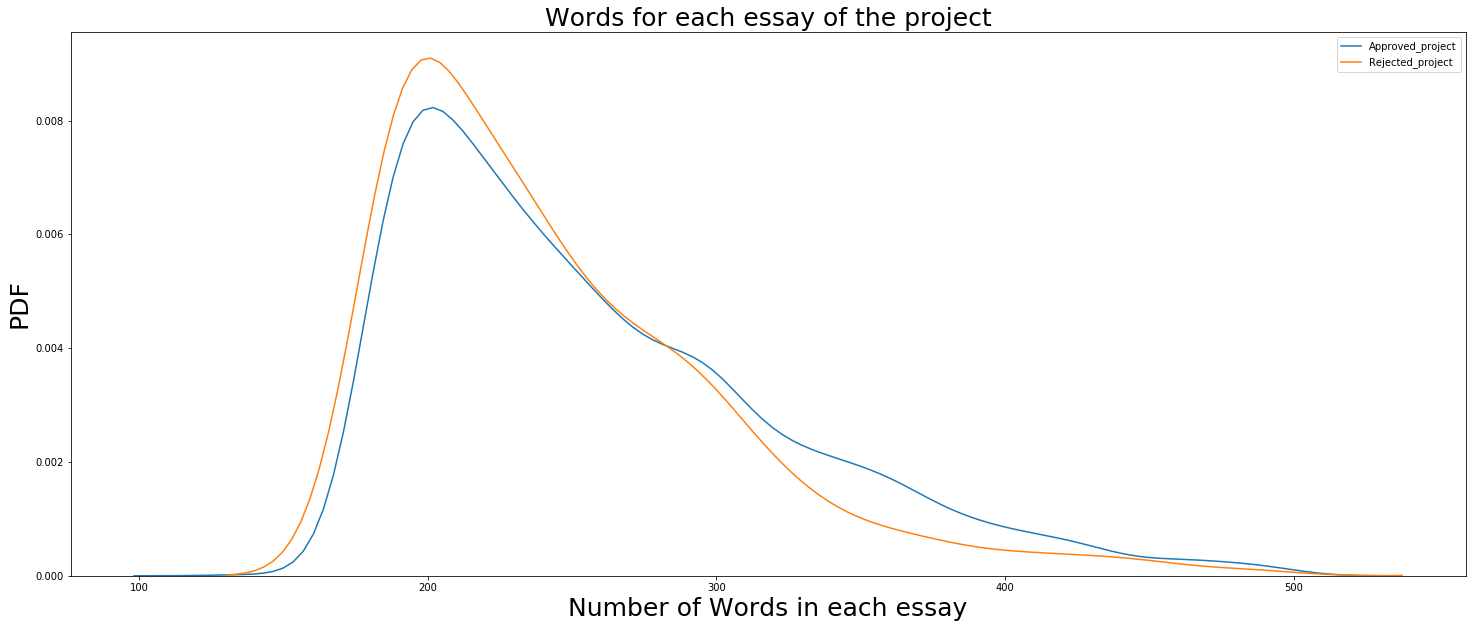

In [159]:
plt.figure(figsize=(25,10))
sns.distplot(word_for_approved,label="Approved_project",hist=False)
sns.distplot(word_for_rejected,label="Rejected_project",hist=False)
plt.title("Words for each essay of the project",fontsize=25)
plt.xlabel("Number of Words in each essay",fontsize=25)
plt.ylabel("PDF",fontsize=25)
plt.legend()
plt.show()

Observation:

from the boxplot we can say  that 25th,50th and 75th percentile of the approved projects are slightly more than not approved projects.It means approved projects have somewhat more no. of words in the essay than not approved projects , the essay of the projects having more words can convince more towards projects proposals 
And from distribution plot approved projects are ahead to the not approved projects.

# Univariate analysis:Cost per project

In [160]:
resource_data.head(3)

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45


In [161]:
price_data=resource_data.groupby('id').agg({"price":"sum","quantity":"sum"}).reset_index()
price_data.head()

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21
2,p000003,298.97,4
3,p000004,1113.69,98
4,p000005,485.99,8


In [162]:
df=pd.merge(df,price_data,on="id",how="left")

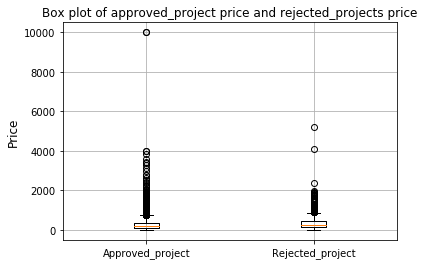

In [163]:
approved_price=df[df["project_is_approved"]==1]["price"].values
rejected_price=df[df["project_is_approved"]==0]["price"].values
plt.boxplot([approved_price,rejected_price])
plt.title("Box plot of approved_project price and rejected_projects price",fontsize=12)
plt.ylabel("Price",fontsize=12)
plt.grid()
plt.xticks((1,2),("Approved_project","Rejected_project"))
plt.show()

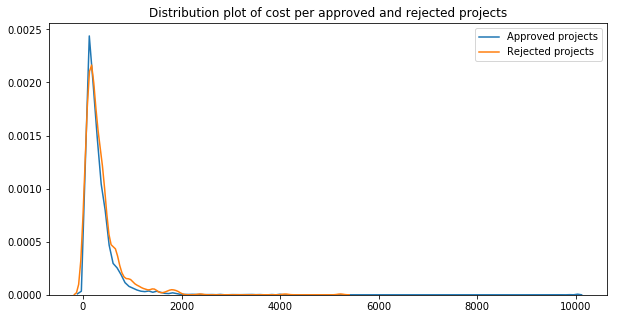

In [164]:
plt.figure(figsize=(10,5))
sns.distplot(approved_price,hist=False,label="Approved projects")
sns.distplot(rejected_price,hist=False,label="Rejected projects")
plt.title("Distribution plot of cost per approved and rejected projects")
plt.legend()
plt.show()

Observations:

maximum projects which are approved having price per project lies within 0-200(almost)
and rejected projects prices also lies almost in that range but price of rejected projects re more than approved projects.

In [165]:
from prettytable import PrettyTable
x=PrettyTable()
x.field_names=("Percentile","Approved_projects","Rejected_projects")
for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_price,i),3),np.round(np.percentile(rejected_price,i),3)])
print(x)    

+------------+-------------------+-------------------+
| Percentile | Approved_projects | Rejected_projects |
+------------+-------------------+-------------------+
|     0      |        1.53       |        2.79       |
|     5      |       13.018      |       40.958      |
|     10     |       31.962      |       73.87       |
|     15     |       54.946      |       98.226      |
|     20     |       74.944      |      122.748      |
|     25     |       98.837      |      144.983      |
|     30     |      114.969      |      164.792      |
|     35     |      134.951      |      180.416      |
|     40     |       157.0       |      202.042      |
|     45     |      177.471      |      229.908      |
|     50     |      198.705      |      259.975      |
|     55     |      224.394      |      284.672      |
|     60     |      255.368      |      319.244      |
|     65     |      284.446      |      360.089      |
|     70     |      321.668      |      395.852      |
|     75  

observations:
    
25th percentile of the price of approved projects is 98.8 while 144.9 of the rejected projects
50th percentile of the price of approved projects is 198.7 while 259.9 of the rejectd projects
75th percentile of the price of approved projects is 369.1 while 440.2 of the rejected projects
so from above table i can say that the price per project of rejected projects is more then price per projects of approved projects.

# Univariate analysis : teacher number of previously posted projects

In [166]:
approved_teacher_num=df[df["project_is_approved"]==1]["teacher_number_of_previously_posted_projects"].values
rejected_teacher_num=df[df["project_is_approved"]==0]["teacher_number_of_previously_posted_projects"].values

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


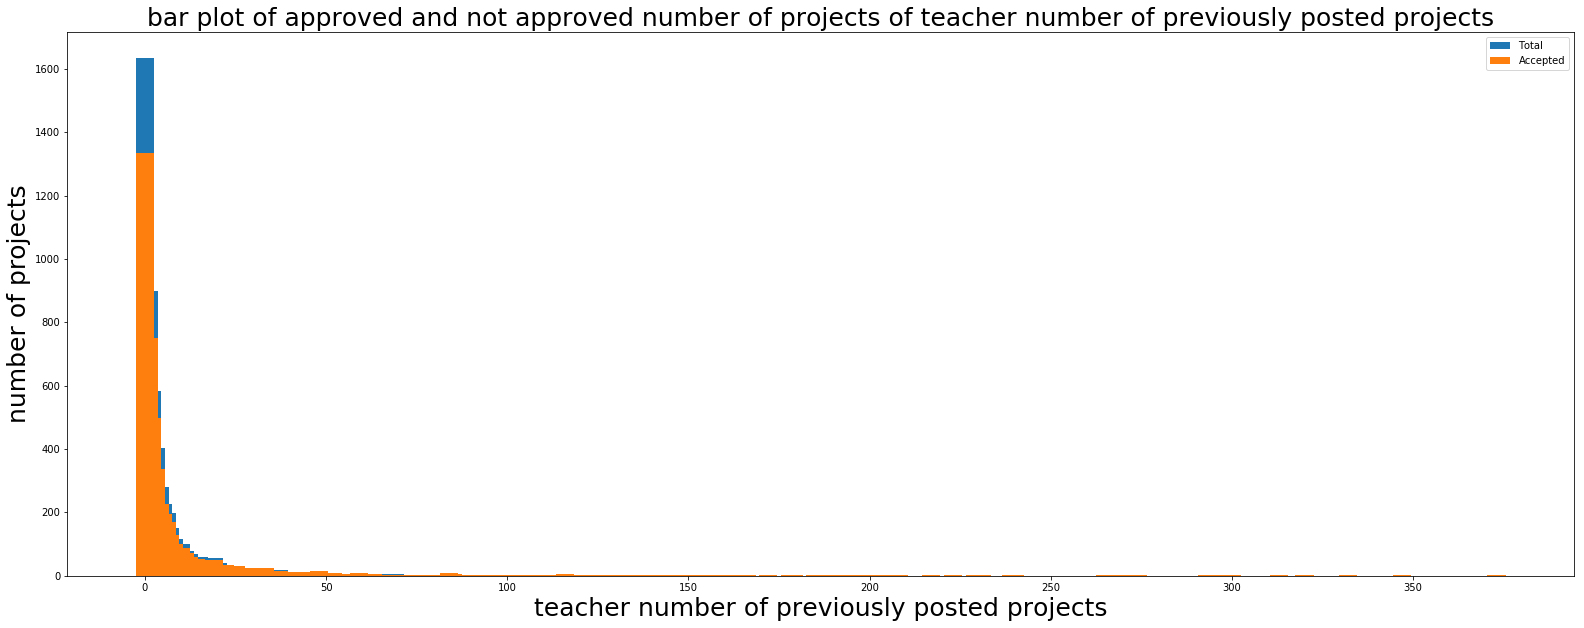

In [167]:
kk=pd.DataFrame(df.groupby("teacher_number_of_previously_posted_projects")["project_is_approved"].agg({"total":"count"})).reset_index()
abhi=pd.DataFrame(df.groupby("teacher_number_of_previously_posted_projects")["project_is_approved"].apply(np.mean)).reset_index()
abhi.columns=("teacher_num","avg")
kk['avg']=abhi["avg"]
approved_number=(kk["avg"].values)*(kk['total'].values)
kk['approved']=approved_number
plt.figure(figsize=(27,10))
plt.bar(kk["teacher_number_of_previously_posted_projects"].values,kk["total"].values,label="Total",width=5)
plt.bar(kk["teacher_number_of_previously_posted_projects"].values,kk['approved'].values,label="Accepted",width=5)
plt.title("bar plot of approved and not approved number of projects of teacher number of previously posted projects",fontsize=25)
plt.xlabel("teacher number of previously posted projects",fontsize=25)
plt.ylabel("number of projects",fontsize=25)
plt.legend()                 
plt.show()

Observation:

from the bar plot i observed that teachers who posted very less projects previously are more likely to have approved projects

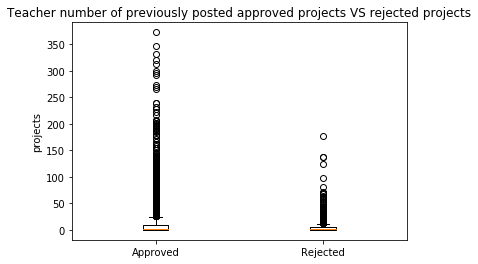

In [168]:
plt.boxplot([approved_teacher_num,rejected_teacher_num])
plt.xticks((1,2),("Approved","Rejected"))
plt.title("Teacher number of previously posted approved projects VS rejected projects")
plt.ylabel("projects")
plt.show()

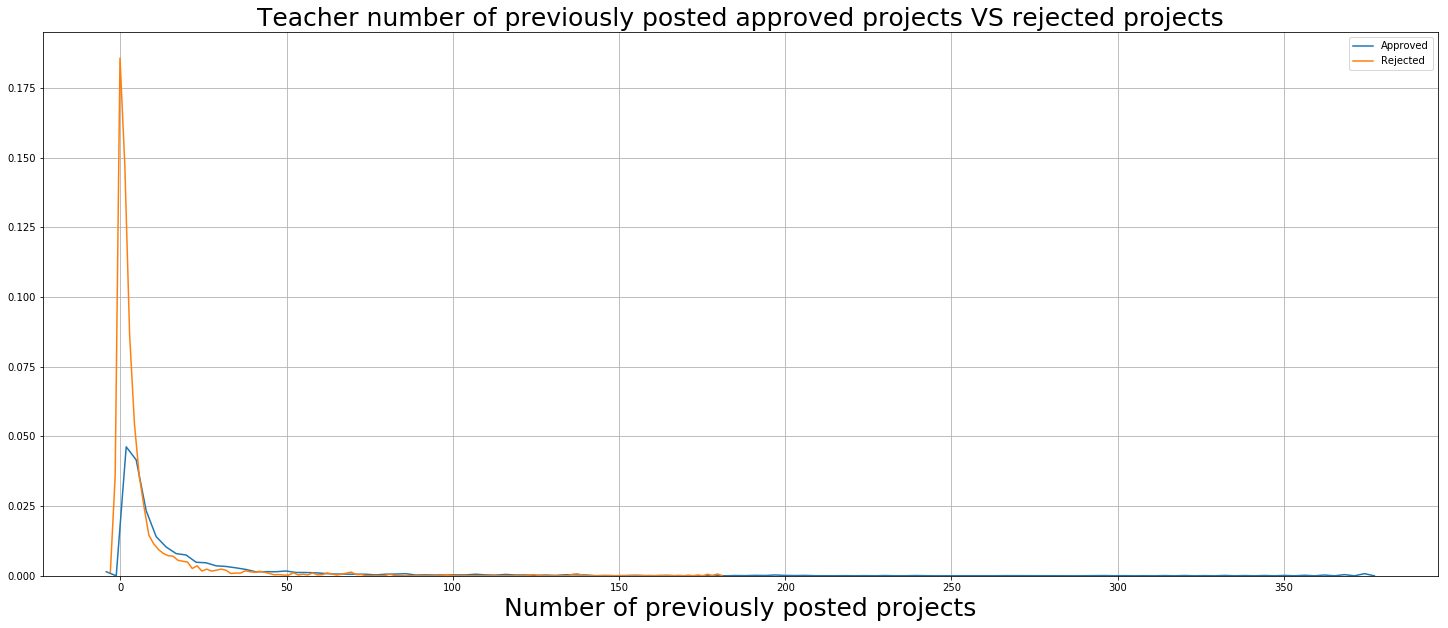

In [169]:
plt.figure(figsize=(25,10))
sns.distplot(approved_teacher_num,label="Approved",hist=False)
sns.distplot(rejected_teacher_num,label="Rejected",hist=False)
plt.title("Teacher number of previously posted approved projects VS rejected projects",fontsize=25)
plt.xlabel("Number of previously posted projects",fontsize=25)
plt.grid()
plt.legend()
plt.show()

In [170]:
import numpy as np
table=PrettyTable()
table.field_names=("Percentile","approved_project","Rejected_project")
for i in range(0,101,5):
    table.add_row([i,np.percentile(approved_teacher_num,i),np.percentile(rejected_teacher_num,i)])

print("\nTable which shows percentile of approved projects and rejected projects of teacher number of previously posted projected")
print(table)    


Table which shows percentile of approved projects and rejected projects of teacher number of previously posted projected
+------------+------------------+--------------------+
| Percentile | approved_project |  Rejected_project  |
+------------+------------------+--------------------+
|     0      |       0.0        |        0.0         |
|     5      |       0.0        |        0.0         |
|     10     |       0.0        |        0.0         |
|     15     |       0.0        |        0.0         |
|     20     |       0.0        |        0.0         |
|     25     |       0.0        |        0.0         |
|     30     |       1.0        |        0.0         |
|     35     |       1.0        |        1.0         |
|     40     |       1.0        |        1.0         |
|     45     |       2.0        |        1.0         |
|     50     |       2.0        |        1.0         |
|     55     |       3.0        |        2.0         |
|     60     |       4.0        |        3.0         

Observations:

From above table we saw that in the approved projected more number of teacher previously posted projects than rejected projected .
But up to 25th percentile both approved and rejected projects have almost same number of teacher previously posted projects

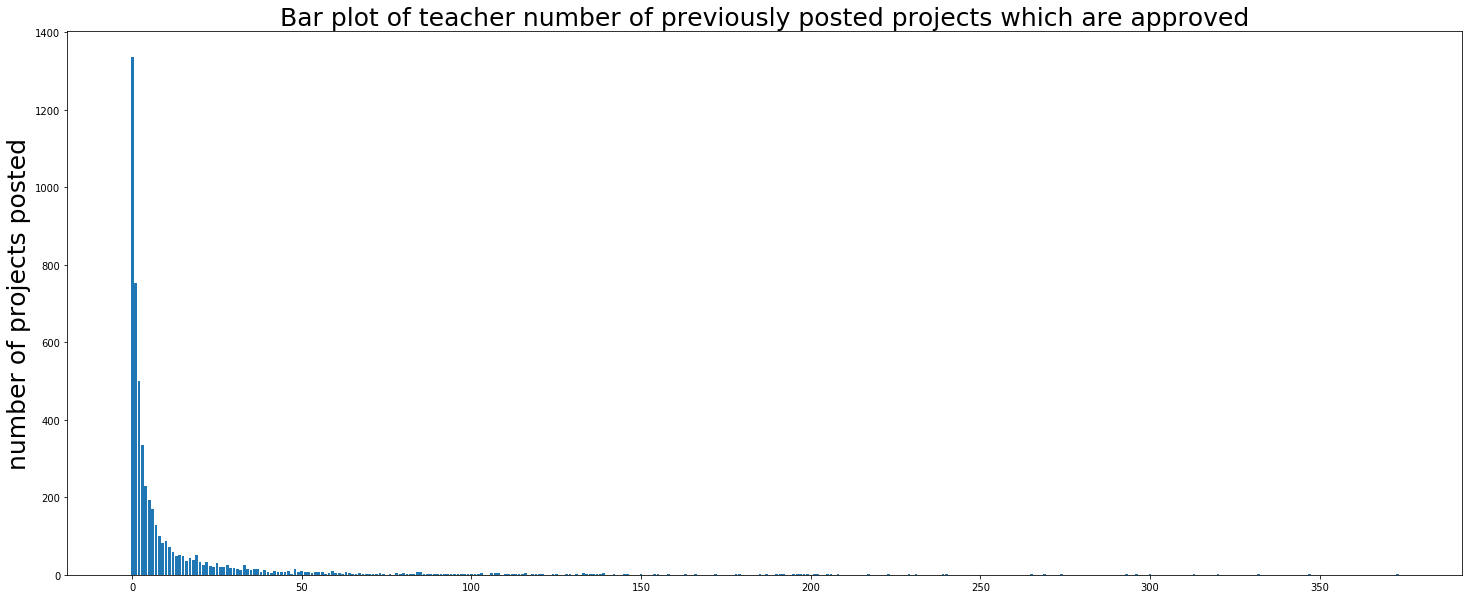

In [171]:
from collections import Counter
my_counter=Counter(approved_teacher_num)
dict_tea_num=dict(my_counter)
sorted_dict_teacher_num=dict(sorted(dict_tea_num.items(),key=lambda kv:kv[1]))
plt.figure(figsize=(25,10))
plt.bar(sorted_dict_teacher_num.keys(),sorted_dict_teacher_num.values())
plt.title("Bar plot of teacher number of previously posted projects which are approved",fontsize=25)
plt.ylabel("number of projects posted",fontsize=25)
plt.show()

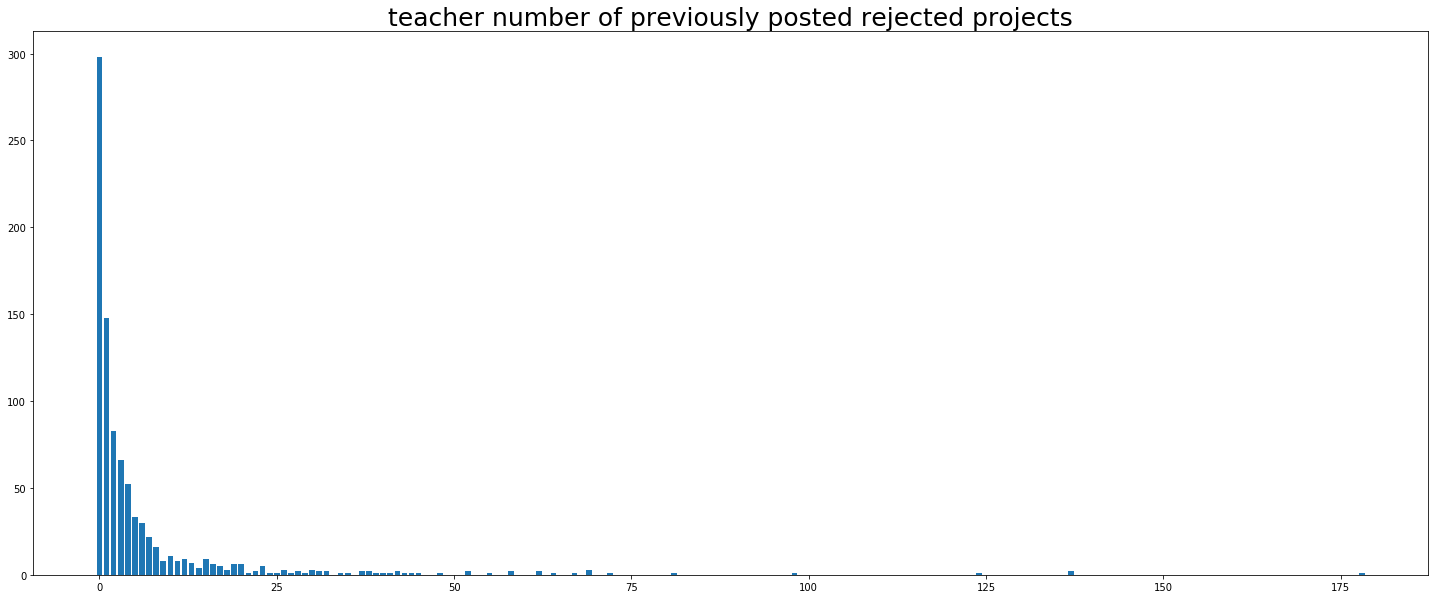

In [172]:
from collections import Counter
my_counter=Counter(rejected_teacher_num)
dict_rej_tea=dict(my_counter)
sorted_dict_rej_teacher_num=dict(sorted(dict_rej_tea.items(),key=lambda kv:kv[1]))
plt.figure(figsize=(25,10))
plt.bar(sorted_dict_rej_teacher_num.keys(),sorted_dict_rej_teacher_num.values())
plt.title("teacher number of previously posted rejected projects",fontsize=25)
plt.show()

# Univariate analysis: projects resource summary

In [173]:
import re
approved_resource_summary=df[df["project_is_approved"]==1]["project_resource_summary"].values
rejected_resource_summary=df[df["project_is_approved"]==0]["project_resource_summary"].values
a=0
b=0
for summary in approved_resource_summary:
    for i in summary.split():
        if(i.isdigit()):
           a+=1
           break
            
for summary in rejected_resource_summary:
    for j in summary.split():
        if(j.isdigit()):
            b+=1
            break

In [174]:
print("% of summmary that contain digit in approved projects : ",(a/len(approved_resource_summary))*100)
print("==============================================")
print("% of summary that contain digit in rejected projects : ",(b/len(rejected_resource_summary))*100)

% of summmary that contain digit in approved projects :  10.4264475743349
% of summary that contain digit in rejected projects :  6.418918918918918


Observation:

almost 10% of projects summary that contain digit are approved and 6.5% of projects summary that contain digit are not approved . we can say that digit in the resource summary are not very important factor towards the approval of the projects.

# Text preprocessing : project title text

In [175]:
project_title=df["project_title"].values

In [176]:
import nltk
nltk.download('stopwords')
from nltk import word_tokenize
from nltk.corpus import stopwords
stopword=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [177]:
from tqdm import tqdm
import re
preprocessed_title=[]
for title in tqdm(project_title):
    sent=decontracted(title)
    sent=sent.replace("\\t",' ')
    sent=sent.replace("\\r",' ')
    sent=sent.replace("\\n",' ')
    sent=sent.replace('\\"',' ')
    sent=re.sub('[^A-Za-z0-9]+',' ',sent)
    sent=' '.join(e.lower() for e in sent.split() if e.lower() not in stopword)
    preprocessed_title.append(sent.strip())
    

100%|███████████████████████████████████████████████████████████████████████████| 6000/6000 [00:00<00:00, 24704.61it/s]


In [178]:
preprocessed_title[500]

'classroom chromebooks college bound seniors'

we are going to consider

From Train Data

   - school_state : categorical data
   - clean_categories : categorical data
   - clean_subcategories : categorical data
   - project_grade_category : categorical data
   - teacher_prefix : categorical data

   - project_title : text data
   - text : text data
   - project_resource_summary: text data
   
From Resource Data

   - quantity : numerical
   - teacher_number_of_previously_posted_projects : numerical
   - price : numerical

In [180]:
from sklearn.feature_extraction.text import CountVectorizer

In [181]:
vectorizer=CountVectorizer(vocabulary=list(sorted_dict.keys()),lowercase=False,binary=True)
vectorizer.fit(df["clean_subject_categories"].values)
print(vectorizer.get_feature_names())

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']


In [182]:
categories_one_hot=vectorizer.transform(df["clean_subject_categories"].values)
print(categories_one_hot.shape)

(6000, 9)


In [183]:
vectorizer=CountVectorizer(vocabulary=list(sorted_sub_dict.keys()),lowercase=False,binary=True)
vectorizer.fit(df["clean_subject_subcategories"].values)
print(vectorizer.get_feature_names())

['Economics', 'FinancialLiteracy', 'CommunityService', 'ForeignLanguages', 'Civics_Government', 'Extracurricular', 'ParentInvolvement', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'PerformingArts', 'SocialSciences', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'History_Geography', 'Music', 'ESL', 'Health_LifeScience', 'EarlyDevelopment', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']


In [184]:
subcategories_one_hot=vectorizer.transform(df["clean_subject_subcategories"].values)
print(subcategories_one_hot.shape)

(6000, 30)


# feature encoding with school state

In [226]:
from tqdm import tqdm
school_list=[]
for state in tqdm(df["school_state"].values):
     state=state.replace("'",'')
     state=state.replace('_','')
     state=state.replace('-','')
     state=state.replace("'",'')
     state=state.replace(".",'') 
     state=re.sub("\S*\d\S*",'',state)
     school_list.append(state.strip())    

100%|██████████████████████████████████████████████████████████████████████████| 6000/6000 [00:00<00:00, 167274.80it/s]


In [227]:

vectorizer=CountVectorizer(vocabulary=set(school_list),lowercase=False,binary=True)
vectorizer.fit(school_list)
print(vectorizer.get_feature_names())
school_state_one_hot=vectorizer.transform(school_list)
school_state_one_hot=school_state_one_hot.toarray()
print(school_state_one_hot.shape)
print("="*60)
print(school_state_one_hot[:5])

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
(6000, 51)
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]


# feature encoding with teacher prefix

In [187]:
df["teacher_prefix"].value_counts()

Mrs.       3136
Ms.        2162
Mr.         570
Teacher     131
Dr.           1
Name: teacher_prefix, dtype: int64

In [203]:
prefix_list=[]
for state in tqdm(df["teacher_prefix"].values):
     state=state.replace("'",'')
     state=state.replace('_','')
     state=state.replace('-','')
     state=state.replace(".",'') 
     state=re.sub("\S*\d\S*",'',state)
     prefix_list.append(state.strip())

100%|██████████████████████████████████████████████████████████████████████████| 6000/6000 [00:00<00:00, 129109.80it/s]


In [228]:

vectorizer=CountVectorizer(vocabulary=set(prefix_list),lowercase=False,binary=True)
vectorizer.fit(prefix_list)
print(vectorizer.get_feature_names())
prefix_one_hot=vectorizer.transform(prefix_list)
prefix_one_hot=prefix_one_hot.toarray()
print(prefix_one_hot.shape)
print(prefix_one_hot[:5])

['Dr', 'Mr', 'Mrs', 'Ms', 'Teacher']
(6000, 5)
[[0 0 1 0 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 1 0 0]]


# Feature encoding with project grade categories

In [229]:
grade_list=[]
for state in tqdm(df["project_grade_category"].values):
     state=state.replace("'",'')
     state=state.replace('_','')
     state=state.replace('-','')
     state=state.replace(".",'')
     state=state.replace(" ",'')   
     #state=re.sub("\S*\d\S*",'',state)
     grade_list.append(state.strip())

100%|██████████████████████████████████████████████████████████████████████████| 6000/6000 [00:00<00:00, 382744.35it/s]


In [230]:

vectorizer=CountVectorizer(vocabulary=set(grade_list),lowercase=False,binary=True)
vectorizer.fit(grade_list)
print(vectorizer.get_feature_names())
grade_one_hot=vectorizer.transform(grade_list)
grade_one_hot=grade_one_hot.toarray()
print(grade_one_hot.shape)
print(grade_one_hot[:5])

['Grades35', 'Grades68', 'Grades912', 'GradesPreK2']
(6000, 4)
[[0 0 0 1]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 0 1]]


# vectorizing text data

Bag of words

In [231]:
from sklearn.feature_extraction.text import CountVectorizer

In [232]:
preprocessed_essay=[]
from bs4 import BeautifulSoup
for essay in tqdm(df["essay"].values):
    essay=BeautifulSoup(essay,"lxml").get_text()
    essay=decontracted(essay)
    essay=essay.replace("\\r",' ')
    essay=essay.replace("\\t",' ')
    essay=essay.replace("\\n",' ')
    essay=essay.replace('\\"',' ')
    essay=re.sub('[^A-Za-z0-9]+',' ',essay)
    sent=' '.join(e.lower() for e in essay.split() if e.lower() not in stopword)
    preprocessed_essay.append(sent.strip())

100%|█████████████████████████████████████████████████████████████████████████████| 6000/6000 [00:06<00:00, 905.64it/s]


In [233]:
vectorizer=CountVectorizer(min_df=10)
text_bow=vectorizer.fit_transform(preprocessed_essay)
print("shape of the sparce matrix : ",text_bow.shape)

shape of the sparce matrix :  (6000, 4692)


In [234]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(min_df=10)
text_tfidf=tfidf_vectorizer.fit_transform(preprocessed_essay)
print("Shape of the sparce mattrix : ",text_tfidf.shape)

Shape of the sparce mattrix :  (6000, 4692)


# vectorizing text data : project title

In [235]:
vectorizer=CountVectorizer(min_df=10)
title_bow=vectorizer.fit_transform(preprocessed_title)
print("shape of the sparce mattrix : ",title_bow.shape)

shape of the sparce mattrix :  (6000, 384)


In [236]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [237]:
vectorizer=TfidfVectorizer(min_df=10)
title_tfidf=vectorizer.fit_transform(preprocessed_title)
print("shape ",title_tfidf.shape)

shape  (6000, 384)


In [238]:
from gensim.models import Word2Vec

In [239]:
sent_pre_essay=[]
for sent in preprocessed_essay:
    sent_pre_essay.append(sent.split())

In [240]:
w2v_model=Word2Vec(sent_pre_essay,min_count=5,workers=3,size=50)

C:\Users\hp\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


# Average Word2Vec

In [241]:
w2v_words=w2v_model.wv.vocab
avg_w2v_essay=[]
for sent in sent_pre_essay:
    sent_vec=np.zeros(50)
    num_vec=0
    for word in sent:
        if word in w2v_words:
            vec=w2v_model.wv[word]
            sent_vec+=vec
            num_vec+=1
    if(num_vec!=0):
        sent_vec/=num_vec
        avg_w2v_essay.append(sent_vec)    

In [242]:
print((avg_w2v_essay[5]))

[ 0.41925548  0.59968313  0.14409068  0.23211272 -0.20373966 -0.24515392
 -0.16451384  0.04387299 -0.07240411  0.36099643 -0.0559345  -0.55028541
  0.00748049 -0.22631829  0.28866734  0.2986258  -0.06266218 -0.71081662
  0.32947684  0.18936312  0.86124322  0.0632039  -0.24668813  0.39920236
  0.03305548  0.21934934  0.10754939 -0.03218458 -0.28409184 -0.01411276
 -0.76408175 -0.50760335  0.48303767 -0.16220051  0.83014723 -0.3644238
 -0.47768155  0.03972465 -0.24982947  0.28402164 -0.31168949 -0.38758351
  0.41410316  0.29737452 -0.50030887  0.29241501 -0.61630944 -0.49156994
  0.50638134  0.5268647 ]


# average word2vec for project_title

In [243]:
sent_pre_title=[]
for title in preprocessed_title:
    sent_pre_title.append(title.split())

In [244]:
w2v_model=Word2Vec(sent_pre_title,workers=3,size=50)
w2v_title_words=w2v_model.wv.vocab
avg_w2v_title=[]
for title in tqdm(sent_pre_title):
    sent_vec=np.zeros(50)
    num_vec=0
    for word in title:
        if word in w2v_title_words:
            sent_vec+=w2v_model.wv[word]
            num_vec+=1
    if(num_vec!=0):
        sent_vec/=num_vec
        avg_w2v_title.append(sent_vec)   

C:\Users\hp\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "
100%|███████████████████████████████████████████████████████████████████████████| 6000/6000 [00:00<00:00, 28811.49it/s]


# tfidf weighted word2vec

In [245]:
tfidf_vect=TfidfVectorizer()
tfidf_vect.fit_transform(preprocessed_title)
words=tfidf_vect.get_feature_names()
dictionary=dict(zip(words,tfidf_vect.idf_))
tfidf_w2v_title=[]
for sent in tqdm(sent_pre_title):
    tfidf_value=0
    t=0
    avg_vec=np.zeros(50)
    for word in sent:
        if word in words and word in w2v_title_words:
            vector=w2v_model.wv[word]
            tfidf_value=(sent.count(word)/len(sent))*dictionary[word]
            avg_vec+=vector*tfidf_value
            t+=tfidf_value
            
    if(t!=0):
        tfidf_w2v_title.append(avg_vec/t)

100%|████████████████████████████████████████████████████████████████████████████| 6000/6000 [00:01<00:00, 3484.45it/s]


In [246]:
from sklearn.preprocessing import StandardScaler

In [247]:
scaler=StandardScaler()
price_standardized=scaler.fit_transform(df["price"].values.reshape(-1,1))

In [248]:
scaler_1=StandardScaler()
quantity_standardized=scaler_1.fit_transform(df['quantity'].values.reshape(-1,1))
print(quantity_standardized.shape)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(6000, 1)


In [249]:
scaler_2=StandardScaler()
tnoppp_standardized=scaler_2.fit_transform(df["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))
print(tnoppp_standardized.shape)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(6000, 1)


In [250]:
print(categories_one_hot.shape)
print(subcategories_one_hot.shape)
print(prefix_one_hot.shape)
print(grade_one_hot.shape)
print(school_state_one_hot.shape)
print(text_bow.shape)
print(text_tfidf.shape)
print(title_bow.shape)
print(title_tfidf.shape)
print(price_standardized.shape)
print(quantity_standardized.shape)
print(tnoppp_standardized.shape)

(6000, 9)
(6000, 30)
(6000, 5)
(6000, 4)
(6000, 51)
(6000, 4692)
(6000, 4692)
(6000, 384)
(6000, 384)
(6000, 1)
(6000, 1)
(6000, 1)


# TSNE on categorical,numerical and project_title(BOW) data

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


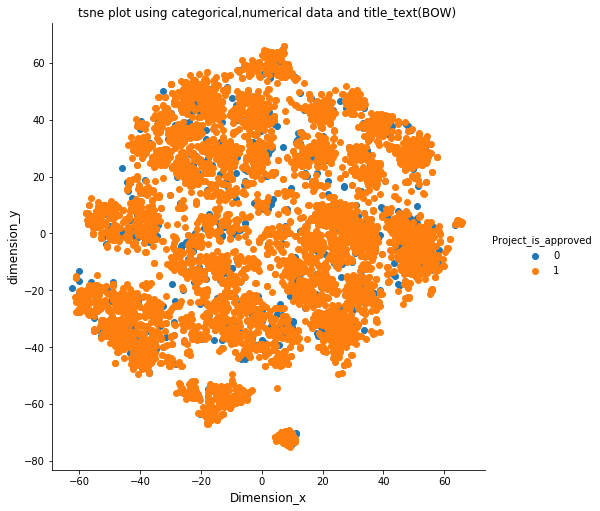

In [252]:
from scipy.sparse import hstack
x1=hstack((categories_one_hot,subcategories_one_hot,prefix_one_hot,grade_one_hot,school_state_one_hot,price_standardized,tnoppp_standardized,title_bow))
from sklearn.manifold import TSNE
tsne_1=TSNE(n_components=2,perplexity=30,learning_rate=200)
x_1_embedding=tsne_1.fit_transform(x1.toarray())
data_1=pd.DataFrame(data=np.hstack((x_1_embedding,df["project_is_approved"].values.reshape(-1,1))),columns=("Dimension_x","Dimension_y","Project_is_approved"))
sns.FacetGrid(data_1,hue="Project_is_approved",size=7).map(plt.scatter,"Dimension_x","Dimension_y").add_legend()
plt.title("tsne plot using categorical,numerical data and title_text(BOW) ",fontsize=12)
plt.xlabel("Dimension_x",fontsize=12)
plt.ylabel("dimension_y",fontsize=12)
plt.show()

Observations:

since i taked 6000 data points so from ths above tsne plt using categorical,numerica features and project title(BOW) i observed that majority of points came from approved project class and both approved points and rejected points are messed up so in can not distinguish approved and not approved projects from the above tsne plot.

# TSNE on categorical,numerical and project_title(tfidf)

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


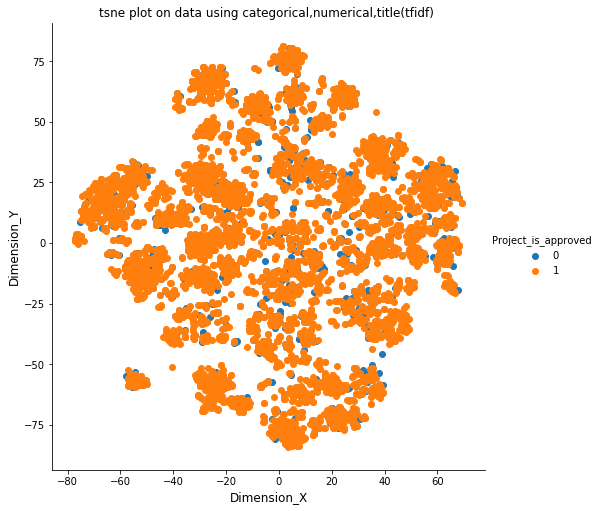

In [253]:
x2=hstack((categories_one_hot,subcategories_one_hot,prefix_one_hot,grade_one_hot,school_state_one_hot,price_standardized,tnoppp_standardized,title_tfidf))
tsne_2=TSNE(n_components=2,perplexity=30)
x_2_embedding=tsne_2.fit_transform(x2.toarray())
data_2=pd.DataFrame(data=np.hstack((x_2_embedding,df["project_is_approved"].values.reshape(-1,1))),columns=("Dimension_x","Dimension_y","Project_is_approved"))
sns.FacetGrid(data_2,hue="Project_is_approved",size=7).map(plt.scatter,"Dimension_x","Dimension_y").add_legend()
plt.title("tsne plot on data using categorical,numerical,title(tfidf) ",fontsize=12)
plt.xlabel("Dimension_X",fontsize=12)
plt.ylabel("Dimension_Y",fontsize=12)
plt.show()

Observations:

From the above tsne plot i observed that both approved and rejected projects are overlapped , so i can't sepatate approved and rejected projects using categorical feature data,numerical feature data and project title(text)(ifidf) data mattrix.

# TSNE plot on categorical,numerical and project_title(Avg_W2V)

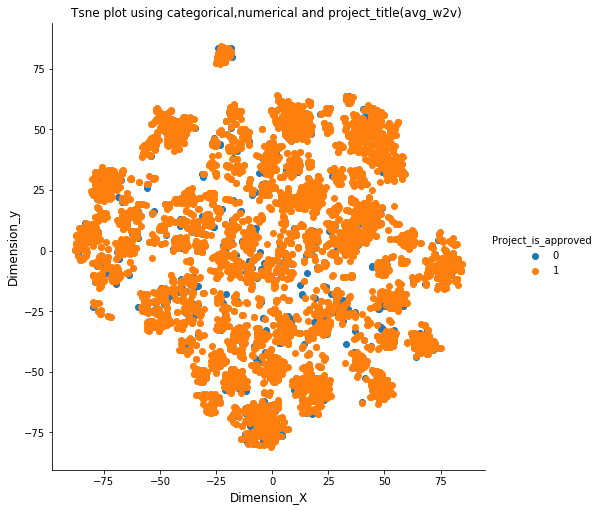

In [256]:
from scipy.sparse import hstack
x3=hstack((categories_one_hot[:5762],subcategories_one_hot[:5762],prefix_one_hot[:5762],grade_one_hot[:5762],school_state_one_hot[:5762],price_standardized[:5762],tnoppp_standardized[:5762],avg_w2v_title))
tsne_3=TSNE(n_components=2,perplexity=30)
x_3_embedding=tsne_3.fit_transform(x3.toarray())
data_3=pd.DataFrame(data=np.hstack((x_3_embedding,df["project_is_approved"].values.reshape(-1,1)[:5762])),columns=("Dimension_x","Dimension_y","Project_is_approved"))
sns.FacetGrid(data_3,hue="Project_is_approved",height=7).map(plt.scatter,"Dimension_x","Dimension_y").add_legend()
plt.title("Tsne plot using categorical,numerical and project_title(avg_w2v) ",fontsize=12)
plt.xlabel("Dimension_X",fontsize=12)
plt.ylabel("Dimension_y",fontsize=12)
plt.show()

Observations:

From the above tsne plot using categorical,numerical data and project title(Avg_W2V) i observed that both approved and rejected projects are completely messed up so i can't distinguish these two classes.

# TSNE using categorical,numerical and project title(tfidf_w2v) 

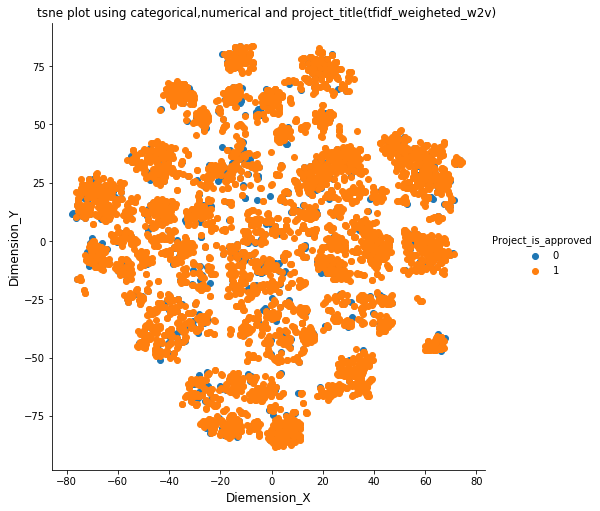

In [258]:
x4=hstack((categories_one_hot[:5758],subcategories_one_hot[:5758],prefix_one_hot[:5758],grade_one_hot[:5758],school_state_one_hot[:5758],price_standardized[:5758],tnoppp_standardized[:5758],tfidf_w2v_title))
tsne_4=TSNE(n_components=2,perplexity=30)
x_4_embedding=tsne_4.fit_transform(x4.toarray())
data_4=pd.DataFrame(data=np.hstack((x_4_embedding,df["project_is_approved"].values.reshape(-1,1)[:5758])),columns=("Dimension_x","Dimension_y","Project_is_approved"))
sns.FacetGrid(data_4,hue="Project_is_approved",height=7).map(plt.scatter,"Dimension_x","Dimension_y").add_legend()
plt.title("tsne plot using categorical,numerical and project_title(tfidf_weigheted_w2v) ",fontsize=12)
plt.xlabel("Diemension_X",fontsize=12)
plt.ylabel("Dimension_Y",fontsize=12)
plt.show()

# TSNE on categorical,numerical and project_title(BOW)+project_title(tfidf)+project_title(Avg_w2v)+project_title(tfidf_w2v)

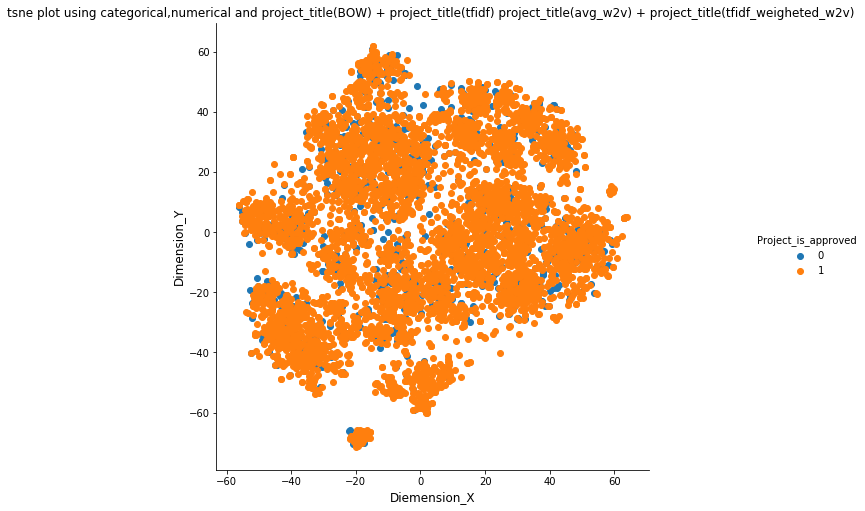

In [261]:
#merge all the categorical,text and numerical features
from scipy.sparse import hstack
X=hstack([categories_one_hot[:5758],subcategories_one_hot[:5758],prefix_one_hot[:5758],grade_one_hot[:5758],school_state_one_hot[:5758],price_standardized[:5758],tnoppp_standardized[:5758],title_bow[:5758],title_tfidf[:5758],avg_w2v_title[:5758],tfidf_w2v_title])
tsne_5=TSNE(n_components=2,perplexity=30)
x_5_embedding=tsne_5.fit_transform(X.toarray())
data_5=pd.DataFrame(data=np.hstack((x_5_embedding,df["project_is_approved"].values.reshape(-1,1)[:5758])),columns=("Dimension_x","Dimension_y","Project_is_approved"))
sns.FacetGrid(data_5,hue="Project_is_approved",height=7).map(plt.scatter,"Dimension_x","Dimension_y").add_legend()
plt.title("tsne plot using categorical,numerical and project_title(BOW) + project_title(tfidf) project_title(avg_w2v) + project_title(tfidf_weigheted_w2v) ",fontsize=12)
plt.xlabel("Diemension_X",fontsize=12)
plt.ylabel("Dimension_Y",fontsize=12)
plt.show()

Observations:
above plot is also a meaningless because both the approved and rejected class data are overlapped heavely so by using this scatter plot i can't separate approved and rejected projects.

# Summary:

From all the 5 tsne scatter plots i observed that no one can be able to distinguish approved projects from rejected projected in efficient way.